---
layout: default
title: "Neural Networks - Backpropagation"
categories: neuralNetwork
permalink: /ML16/
order: 16
comments: true
---

In [2]:
%pylab --no-import-all inline
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


#  Backpropagation

Given the cost function for an artificial neural network

$$
\begin{align}
J(\Theta)=&-\frac{1}{m}\left[\sum^m_{i=1}\sum^K_{k=1}y_k^{(i)}\log \left(h_\Theta\left(x^{(i)}\right)\right)_k+\left(1-y_k^{(i)}\right)\log\left(1-h_\Theta \left(x^{(i)}\right)\right)_k\right] \\
&+\frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}}\left(\Theta_{ji}^{(l)}\right)^2
\end{align}
\label{eq:neuralnetcost} \tag{1}
$$

we want to find the parameters $\Theta$ that minimize the $\eqref{eq:neuralnetcost}$

$$
\min_{\Theta}J(\Theta)
$$

So in order to use gradient descent or other optimization algorithms we need to compute the cost function $\eqref{eq:neuralnetcost}$ and its partial derivative respect to $\Theta \; \eqref{eq:partdev}$ 

$$
\begin{equation}
\frac{\partial}{\partial\theta_{ij}^{(l)}}J(\Theta)
\end{equation}
\label{eq:partdev} \tag{2}
$$

Where $\theta_{ij}^{(l)} \in \mathbb{R}$

## Gradient computation

### Gradient for a single example
Suppose that we have only one training example $(x, y)$ and the neural network in the picture below

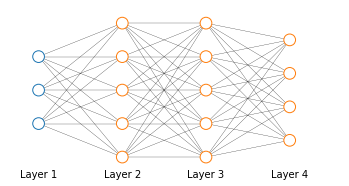

In [3]:
ax, *_ = ann([3, 5, 5, 4], node_colors=True, layer_labels=True, width=2)
ax.set_aspect('equal');

The first thing we are going to do is applying **forward propagation**

$$
\begin{align}
&a^{(1)} = x \\ 
&a^{(2)} = g\left(\Theta^{(1)}a^{(1)}\right); \quad (\text{add }  a_0^{(2)})\\ 
&a^{(3)} = g\left(\Theta^{(2)}a^{(2)}\right); \quad (\text{add }  a_0^{(3)})\\ 
h_\Theta(x) =\; &a^{(4)} = g\left(\Theta^{(3)}a^{(3)}\right)\\ 
\end{align}
$$

In order to compute the derivative we are going to use an algorithm called backpropagation. For each node we are going to compute the term $\delta_j^{(l)}$ that will represent the error of node $j$ in layer $l$ with resepect to $a_j^{(l)}$. For the neural network in the picture we are going to compute $\delta_j^{(l)}$ for each output unit (layer $L=4$) and then proceed backward and compute the error for the previous layers (hence the name back-propagation).

$$
\begin{align}
&\delta^{(4)} = a^{(4)} - y \\
&\delta^{(3)} = \left(\Theta^{(3)}\right)^T\delta^{(4)} \; \odot \; g'\left(z^{(3)}\right)\\ 
&\delta^{(2)} = \left(\Theta^{(2)}\right)^T\delta^{(3)} \; \odot \; g'\left(z^{(2)}\right)\\  
\end{align}
$$

Where

* $\delta^{(l)}$ and $a^{(l)}$ are the vectors of respectively errors and activation values at layer $l$; 
* $\odot$ is the symbol for element-wise (Hadamard) product;
* $g'\left(z^{(l)}\right)$ is the derivative of the activation function $g$ at the input value given by $z^{(l)}$ and is computed as $a^{(l)} \odot \left(1-a^{(l)}\right)$

There is no $\delta^{(1)}$ term because layer 1 is the input layer and contains the observed features so there is no error associated to that (there might be an error but we don't want to change those values so we don't want to define a $\delta^{(l)}$ error).

Finally we want to compute $\eqref{eq:partdev}$. The derivation becomes quite complicated but it is possible to prove that, ignoring regularization or setting the regularization term $\lambda=0$

$$
\begin{equation}
\frac{\partial}{\partial\Theta_{ij}^{(l)}}J(\Theta) = a_j^{(l)}\delta_i^{(l+i)} \quad \quad (\text{ignoring }\lambda; \text{ if } \lambda=0 )
\end{equation}
\label{eq:deriv} \tag{3}
$$

### Gradient for multiple examples
Now we can extend the case discussed for one example to multiple examples $\lbrace \left( x^{(1)}, y^{(1)}\right), \cdots, \left( x^{(m)}, y^{(m)}\right) \rbrace$

The first step will be to set $\Delta_{ij}^{(l)} = 0$ that will accumulate all the errors and will be used to compute $\frac{\partial}{\partial\Theta_{ij}^{()}l}J(\Theta)$

Then we are going to loop through each example from $i=1$ to $m$, and for each example $\left( x^{(i)}, y^{(i)}\right)$ we will

1. Set $a^{(1)} = x^{(i)}$
2. Perform forward propagation to compute $a^{(l)}$ for $l = 2, 3, \dots, L$
3. Use the output label for the current example $y^{(i)}$, to compute the error term $\delta^{(L)}=\Delta_{ij}^{(l)} = 0 - y^{(i)}$
4. Back-propagate the error down to the first hidden layer $\delta^{(L-1)}, \delta^{(L-2)}, \dots \delta^{(2)}$
5. Accumulate the partial derivatives $\Delta_{ij}^{(l)} := \Delta_{ij}^{(l)} + a_j^{(l)}\delta_i^{(l+1)}$ (or in its vectorized form $\Delta^{(l)} := \Delta^{(l)} + \delta^{(l+1)}\left(a^{(l)}\right)^T$)

Now we can finally calculate the accumulator term $D_{ij}^{(l)}$, the calculation of which can take two forms depending on $j$:

$$
\begin{align}
D_{ij}^{(l)} := \frac{1}{m}\Delta_{ij}^{(l)} + \lambda\Theta_{ij}^{(l)} &\quad\quad \text{if } j \neq 0 \\
D_{ij}^{(l)} := \frac{1}{m}\Delta_{ij}^{(l)} &\quad\quad \text{if } j = 0
\end{align}
$$

Where the case of $j=0$ corresponds to the bias term and that is why we don't regularize in that case.

It can then be demonstrated that $D_{ij}^{(l)}$ is equal to the partial derivative of $J(\Theta)$ respect to $\Theta$

$$
\frac{\partial}{\partial\Theta}J(\Theta)=D_{ij}^{(l)}
$$

## Back-propagation inuition
To try and understand back-porpagation let's first see exactly what is happening in forward propagation

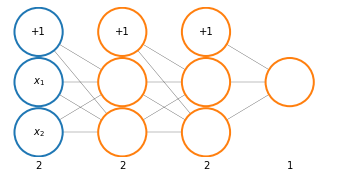

In [4]:
nodelabels=['+1', '$x_1$', '$x_2$', '+1', '', '', '+1']
layerlabels=['2', '2', '2', '1']
ax, *_ = ann([3, 3, 3, 1], node_colors=True, layer_labels=layerlabels, width=2, height=.9, node_labels=nodelabels, radius=3.6, bias=True, node_lw=2)
ax.set_aspect('equal')

Let's take the network depicted above, the count of units (excluding the bias) are 2 for the input layer and for the two input layers and 1 for the output layer 

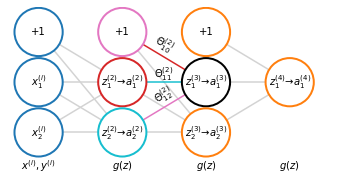

In [29]:
nodecolors=['C0']*3 + ['C6', 'C3', 'C9', 'C1', 'k'] + ['C1']*4
nodelabels=['+1', '$x_1^{(i)}$', '$x_2^{(i)}$', '+1', '$z_1^{(2)} \\to a_1^{(2)}$', 
            '$z_2^{(2)} \\to a_2^{(2)}$', '+1', '$z_1^{(3)} \\to a_1^{(3)}$', 
            '$z_2^{(3)} \\to a_2^{(3)}$', '$z_1^{(4)} \\to a_1^{(4)}$']
layerlabels=['$x^{(i)}, y^{(i)}$'] + ['$g(z)$']*3
edgelabels=['']*6 + ['$\Theta_{10}^{(2)}$', '',
                     '$\Theta_{11}^{(2)}$', '', 
                     '$\Theta_{12}^{(2)}$']
g = 'lightgray'
edgecolors=[g] * 6 + ['C3', g, 'C9', g, 'C6'] + [g] * 4

ax, *_ = ann([3, 3, 3, 1], node_colors=nodecolors, layer_labels=layerlabels, 
             edge_labels=edgelabels, width=2, height=.9, node_labels=nodelabels, edge_lw=1.5,
             radius=3.6, bias=True, node_lw=2, edge_label_spacing=0, edge_colors=edgecolors)
ax.set_aspect('equal')

When performing forward propagation for one example $x^{(i)}, y^{(i)}$, we will feed $x^{(i)}$ in the input layer ($x_1^{(i)}, x_2^{(i)}$). The computation of $z^{(3)}$  in forward propagation is:

$$
\begin{equation}
z^{(3)}
=\color{magenta}{\Theta_{10}^{(2)} \cdot 1}
+\color{red}{\Theta_{11}^{(2)}a_1^{(2)}}
+\color{cyan}{\Theta_{12}^{(2)}a_2^{(2)}}
\end{equation}
\label{eq:forprop} \tag{4}
$$

Back propagation does something very similar to $\eqref{eq:forprop}$ except that the direction of the operation is reversed.

To understand what back-propagation is doing let's focus on the cost function $\eqref{eq:neuralnetcost}$. Since we have just one output unit we can simplify $\eqref{eq:neuralnetcost}$ to 

$$
\begin{align}
J(\Theta)=&-\frac{1}{m}\left[\sum^m_{i=1}y^{(i)}\log \left(h_\Theta\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-h_\Theta \left(x^{(i)}\right)\right)\right] \\
&+\frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}}\left(\Theta_{ji}^{(l)}\right)^2
\end{align}
$$

Now since forward and back-propagation are applied to one example at a time, let's focus on a single example $x^{(i)}, y^{(i)}$  and ignore regularization ($\lambda=0$); the cost function $\text{cost}$

$$
\begin{equation}
\text{cost}(i) = y^{(i)}\log \left(h_\Theta\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-h_\Theta \left(x^{(i)}\right)\right)
\end{equation}
\label{eq:costi} \tag{5}
$$

calculates the distance between our prediction $h_\Theta(x)$ and labels $y$ in the case of a logistic function. In a way this is very similar to the cost function for linear regression and for simplicity we may think the cost function as

$$\text{cost}(i) \approx \left(h_\Theta\left(x^{(i)}\right) - y^{(i)}\right)^2$$

Now let's look at what back-propagation is doing

In a previous section we said that back-propagation computes $\delta_j^{(l)}$ and called that term the "error" $a_j^{(l)}$. More formally $\delta_j^{(l)}$ are the partial deriative with respect to the intermediate terms $z_j^{(l)}$ of the cost function $\eqref{eq:costi}$.

$$\delta_j^{(l)} = \frac{\partial}{\partial z_j^{(l)}}\text{cost}(i)$$

And they are a measuer of how much we would like to change the neural networks weight in order to affect the intermediate terms $z_j^{(l)}$

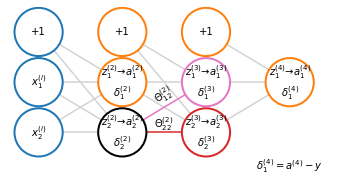

In [44]:
nodecolors=['C0'] * 3 + ['C1', 'C1', 'k', 'C1', 'C6', 'C3', 'C1', 'C1']
edgecolors=[g] * 10 + ['C6', 'C3'] + [g] * 9

nodelabels=['+1', '$x_1^{(i)}$', '$x_2^{(i)}$', 
            '+1', '$z_1^{(2)} \\to a_1^{(2)}$\n$\delta_1^{(2)}$', 
            '$z_2^{(2)} \\to a_2^{(2)}$\n$\delta_2^{(2)}$',
            '+1', '$z_1^{(3)} \\to a_1^{(3)}$\n$\delta_1^{(3)}$', 
            '$z_2^{(3)} \\to a_2^{(3)}$\n$\delta_2^{(3)}$', 
            '$z_1^{(4)} \\to a_1^{(4)}$\n$\delta_1^{(4)}$']

edgelabels=[''] * 10 + ['$\Theta_{12}^{(2)}$', '$\Theta_{22}^{(2)}$']

layerlabels=['', '', '', '$\delta_1^{(4)} = a^{(4)} - y$']

ax, *_ = ann([3, 3, 3, 1], node_colors=nodecolors, layer_labels=layerlabels, 
             edge_labels=edgelabels, width=2, height=.9, node_labels=nodelabels, edge_lw=1.5,
             radius=3.6, bias=True, node_lw=2, edge_label_spacing=0, edge_colors=edgecolors)
ax.set_aspect('equal')

$$
\delta_2^{(2)}=\color{magenta}{\Theta_{12}^{(i)}\delta_1^{(3)}}+\color{red}{\Theta_{22}^{(3)}\delta_2^{(3)}}
$$